#Imports

In [2]:
#Standard data processing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#To unpickle the dataset
import pickle

#For gabage collection
import gc

#To visualize images and graphs
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Using keras Sequential API to build a model
import keras
import tensorflow as tf
from keras import optimizers
from tensorflow.keras.layers import Layer
from keras.models import Model,Sequential
from keras.layers import Input,Flatten,Dense
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras.applications.vgg19 import VGG19
from keras.models import load_model

Using TensorFlow backend.


#Colab File Handling

##Mounting Google Drive

In [2]:
from google.colab import drive
while(True):
    
    # A try-catch loop fixes the issue of the mount timing out
    try:
        drive.mount('/content/gdrive')
        break;
    except:
        continue

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#Switching to the task directory
cd gdrive/My\ Drive/IIIT-D\ Task/

/content/gdrive/My Drive/IIIT-D Task


In [0]:
PATH = "Vision_task_dataset_public/"

In [5]:
!ls Vision_task_dataset_public/

'hitkul(sample_submission).csv'   train_image.pkl
 test_image.pkl			  train_label.pkl


In [0]:
with open(PATH + 'train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open(PATH + 'test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    
with open(PATH + 'train_label.pkl', 'rb') as f:
    train_label = pickle.load(f)
    
sample_submission = pd.read_csv(PATH + "hitkul(sample_submission).csv")

In [7]:
print(type(train_data))
print(type(train_data[0]))
print(type(train_label))
print(train_data.__len__())
print(train_data[0].__len__())

<class 'list'>
<class 'list'>
<class 'list'>
8000
784


In [8]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
train_data = train_data.reshape([-1,28,28,1])
test_data = test_data.reshape([-1,28,28,1])
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
print(train_data.shape)
print(test_data.shape)

(8000, 28, 28, 1)
(2000, 28, 28, 1)


In [9]:
np.unique(train_label)

array([0, 2, 3, 6])

In [0]:
train_label[train_label == 2] = 1
train_label[train_label == 3] = 2
train_label[train_label == 6] = 3

In [11]:
np.unique(train_label)

array([0, 1, 2, 3])

In [0]:
number_of_classes = 4

train_label = np_utils.to_categorical(train_label, number_of_classes)

In [13]:
train_label.shape

(8000, 4)

In [14]:
np.sum(train_label,axis = 0)

array([2000., 2000., 2000., 2000.], dtype=float32)

In [0]:
training_data,validation_data,training_label,validation_label = train_test_split(train_data,train_label, test_size=0.20, random_state=42)

In [16]:
np.sum(training_label,axis = 0)

array([1575., 1621., 1603., 1601.], dtype=float32)

In [17]:
validation_label[0:5,:]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [0]:
NUM_TRAIN = train_data.shape[0]
TRAIN_SIZE = training_data.shape[0]
VALIDATE_SIZE = validation_data.shape[0]
IMAGE_SHAPE = train_data.shape[1:4]
BATCH_SIZE = 12
EPOCHS = 10

In [19]:
train_data.shape

(8000, 28, 28, 1)

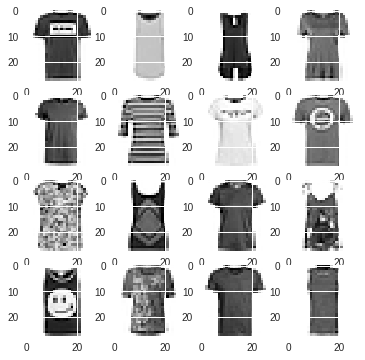

In [52]:
f, ax = plt.subplots(4,4, figsize=(6, 6))
for index in range(16):
    ax[int(index/4),index%4].imshow(train_data[index,:,:,0])
f.show()

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow(training_data,training_label,batch_size = BATCH_SIZE)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(validation_data, validation_label)

#Attempt 1 

In [21]:
Classifier = Sequential()
Classifier.add(Conv2D(filters = 16, kernel_size = (3,3), input_shape = IMAGE_SHAPE, activation = 'relu'))
Classifier.add(BatchNormalization(axis=-1))
Classifier.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
Classifier.add(BatchNormalization(axis=-1))
Classifier.add(MaxPooling2D((2,2), strides = 2))
Classifier.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
Classifier.add(MaxPooling2D((2,2), strides = 2))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation = 'relu'))
Classifier.add(Dropout(0.2))
Classifier.add(Dense(4, activation = 'softmax'))
Classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [0]:
Classifier.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(lr=1e-4),metrics=['acc'])

In [0]:
earlystop = EarlyStopping(patience=20)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
mc = ModelCheckpoint(
        "shallow_model.h5",
        monitor='val_acc',
        save_best_only=True,
        mode='max',
        verbose=1)
callbacks = [earlystop, learning_rate_reduction,mc]

In [0]:
epochs=150
history = Classifier.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=VALIDATE_SIZE//BATCH_SIZE,
    steps_per_epoch=TRAIN_SIZE//BATCH_SIZE,
    callbacks=callbacks
)
Classifier.save("s_model.g5")

Epoch 1/150
496/533 [==========================>...] - ETA: 1s - loss: 1.0217 - acc: 0.5721

#Attempt 2

###Model definition

In [0]:
tf.keras.backend.clear_session()
for i in range(10): gc.collect()

In [0]:
def VGG1D(input_shape):
    input_tensor=Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation='softmax', name='predictions')(x)
    return Model(inputs=[input_tensor],outputs=[x])

In [0]:
Classifier = VGG1D((IMAGE_SHAPE))

In [29]:
Classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 128)         0         
__________

In [0]:
Classifier.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(lr=1e-4),metrics=['acc'])

###Model Training

In [0]:
Classifier = load_model("deep_model.h5")

In [0]:
earlystop = EarlyStopping(patience=25)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
mc = ModelCheckpoint(
        "deep_model.h5",
        monitor='val_acc',
        save_best_only=True,
        mode='max',
        verbose=1)
callbacks = [earlystop, learning_rate_reduction,mc]

In [0]:
epochs=15
history = Classifier.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=VALIDATE_SIZE//BATCH_SIZE,
    steps_per_epoch=TRAIN_SIZE//BATCH_SIZE,
    callbacks=callbacks
)
Classifier.save("d_model.g5")

In [0]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))
ax1.plot(missloss===, color='b', label="Training loss")
ax1.set_xticks(np.arange(0, iter, 5))
ax1.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [56]:
test_data.shape

(2000, 28, 28, 1)

In [0]:
prediction = Classifier.predict(test_data)

In [0]:
prediction = np.argmax(prediction, axis = 1)

In [80]:
prediction.shape

(2000,)

In [0]:
prediction[prediction == 1] = 2
prediction[prediction == 2] = 3
prediction[prediction == 3] = 6

In [82]:
prediction.shape

(2000,)

In [83]:
df = pd.DataFrame({'image_index': list(np.arange(len(prediction))) ,'class': prediction})
df = df[['image_index', 'class']]
df.head()

,class,image_index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df.to_csv('test_submission.csv', index=False)

In [64]:
sample_submission

,image_index,class
0,0,2
1,1,3
2,2,0
3,3,6
